# Fashion-MNIST classification

In [1]:
from functools import partial

import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [3]:
labels = [
    'top', 'trousers', 'pullover', 'dress', 'coat',
    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [4]:
val_x, val_y = test_x[:5000], test_y[:5000]
test_x, test_y = test_x[5000:], test_y[5000:]

In [5]:
print(f'Images shape: {train_x.shape} : {val_x.shape} : {test_x.shape}')
print(f'Labels shape: {train_y.shape} : {val_y.shape} : {test_y.shape}')

Images shape: (60000, 28, 28) : (5000, 28, 28) : (5000, 28, 28)
Labels shape: (60000,) : (5000,) : (5000,)


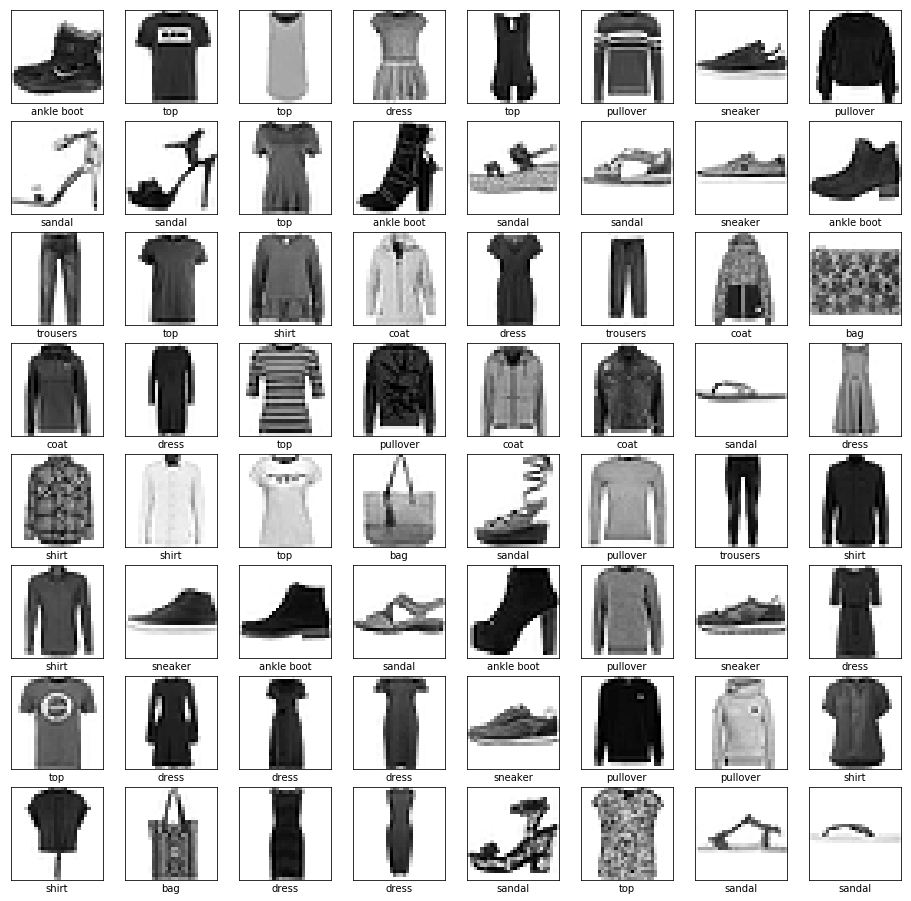

In [6]:
plt.figure(figsize=(16, 16))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_y[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

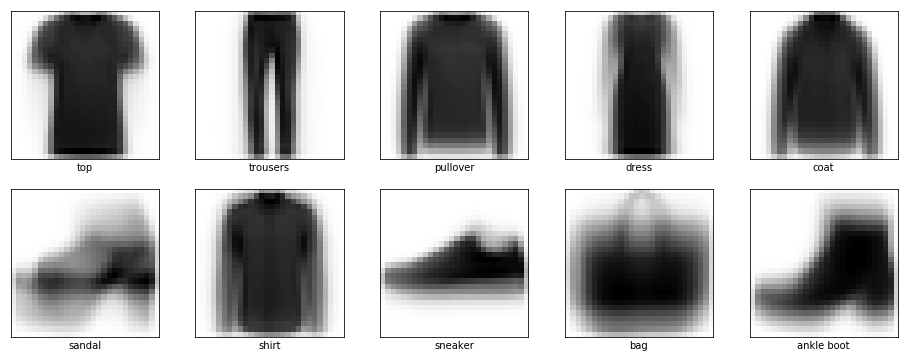

In [7]:
centroids = [(labels[i], np.mean(train_x[train_y == i], axis=0)) for i in np.unique(train_y)]

plt.figure(figsize=(16, 6))
for i, (label, image) in enumerate(centroids):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(label)
    plt.xticks([])
    plt.yticks([])
plt.show()

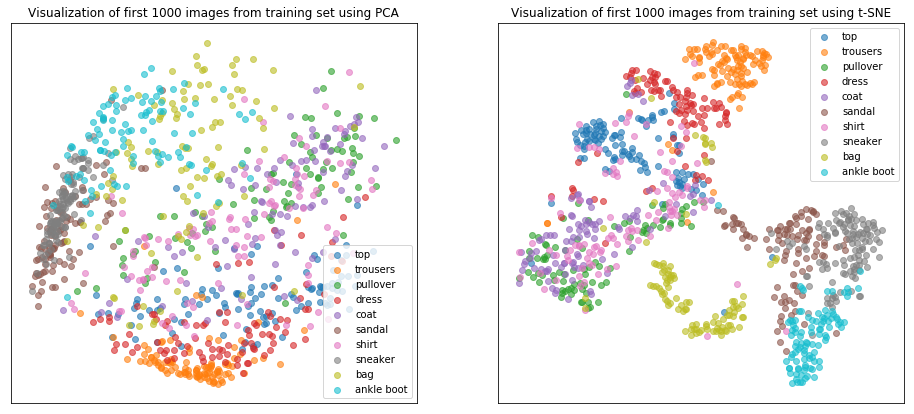

In [8]:
n_points = 1000
plt.figure(figsize=(16, 7))
for i, (alg_name, alg) in enumerate([
        ('PCA', PCA(n_components=2)), ('t-SNE', TSNE(n_components=2))]):
    x = alg.fit_transform(train_x[:n_points].reshape(-1, 784))
    y = train_y[:n_points]
    data = [(labels[i], x[y == i]) for i in np.unique(y)]
    
    plt.subplot(1, 2, i + 1)
    for label, points in data:
        plt.scatter(points[:, 0], points[:, 1], alpha=0.6, label=label)
    plt.title(f'Visualization of first {n_points} images from training set using {alg_name}')
    plt.legend()
    plt.xticks([])
    plt.yticks([])
plt.show()

In [9]:
train_x = train_x.astype(np.float32) / 255
val_x = val_x.astype(np.float32) / 255
test_x = test_x.astype(np.float32) / 255

In [10]:
def plot_history(history):
    plt.figure(figsize=(16, 5))
    for i, (name, key) in enumerate([('accuracy', 'acc'), ('loss', 'loss')]):
        plt.subplot(1, 2, i + 1)
        plt.plot(history.epoch, history.history[key], label=f'training {name}')
        plt.plot(history.epoch, history.history[f'val_{key}'], label=f'validation {name}')
        plt.title(f'Visualization of {name} during training')
        plt.legend()
        plt.xlabel('epoch')
        plt.ylabel(name)
    plt.show()


def plot_confusion_matrix(cm, labels=labels):
    plt.figure(figsize=(7, 7))
    plt.imshow(cm, cmap=plt.cm.binary)
    threshold = np.max(cm) / 2
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(
                j, i, cm[i, j], color='white' if cm[i, j] > threshold else 'black',
                horizontalalignment='center', verticalalignment='center')
    plt.title('Confusion matrix')
    plt.xlabel('predicted label')
    plt.xticks(range(len(labels)), labels, rotation=90)
    plt.ylabel('true label')
    plt.yticks(range(len(labels)), labels)
    plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(
    train_x, train_y,
    validation_data=(val_x, val_y),
    epochs=50, batch_size=250,
    verbose=2)

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 1s - loss: 0.7184 - acc: 0.7463 - val_loss: 0.4871 - val_acc: 0.8318
Epoch 2/50
 - 0s - loss: 0.5039 - acc: 0.8203 - val_loss: 0.4373 - val_acc: 0.8472
Epoch 3/50
 - 0s - loss: 0.4554 - acc: 0.8363 - val_loss: 0.4119 - val_acc: 0.8536
Epoch 4/50
 - 0s - loss: 0.4302 - acc: 0.8469 - val_loss: 0.3915 - val_acc: 0.8618
Epoch 5/50
 - 0s - loss: 0.4129 - acc: 0.8496 - val_loss: 0.3851 - val_acc: 0.8592
Epoch 6/50
 - 0s - loss: 0.3974 - acc: 0.8549 - val_loss: 0.3719 - val_acc: 0.8654
Epoch 7/50
 - 0s - loss: 0.3907 - acc: 0.8574 - val_loss: 0.3699 - val_acc: 0.8688
Epoch 8/50
 - 0s - loss: 0.3792 - acc: 0.8619 - val_loss: 0.3615 - val_acc: 0.8696
Epoch 9/50
 - 1s - loss: 0.3741 - acc: 0.8626 - val_loss: 0.3558 - val_acc: 0.8706
Epoch 10/50
 - 0s - loss: 0.3649 - acc: 0.8652 - val_loss: 0.3488 - val_acc: 0.8728
Epoch 11/50
 - 0s - loss: 0.3605 - acc: 0.8670 - val_loss: 0.3510 - val_acc: 0.8728
Epoch 12/50
 - 1s - loss: 0.3545 - a

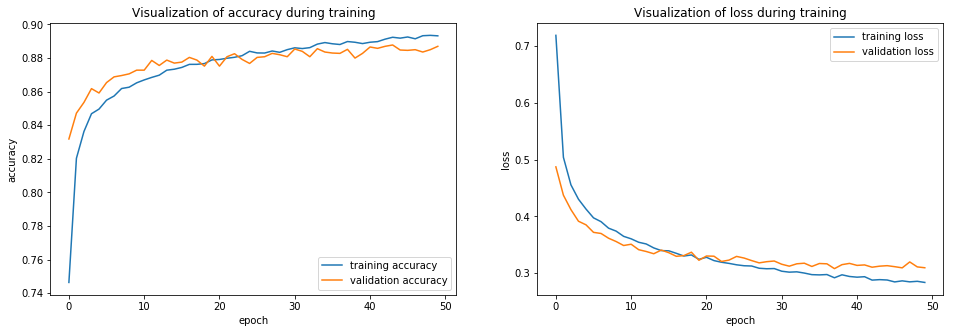

In [13]:
plot_history(history)

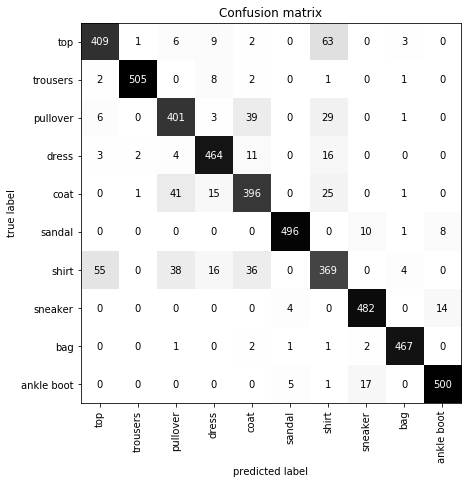

In [14]:
cm = confusion_matrix(test_y, model.predict(test_x).argmax(axis=-1))
plot_confusion_matrix(cm)

In [15]:
_, acc = model.evaluate(test_x, test_y, verbose=0)
print(f'Accuracy on test set: {100 * acc:.2f}%')

Accuracy on test set: 89.78%


In [16]:
hog_settings = {
    'orientations': 8, 'pixels_per_cell': (4, 4),
    'cells_per_block': (1, 1), 'block_norm': 'L2-Hys'}
hog = partial(hog, **hog_settings)

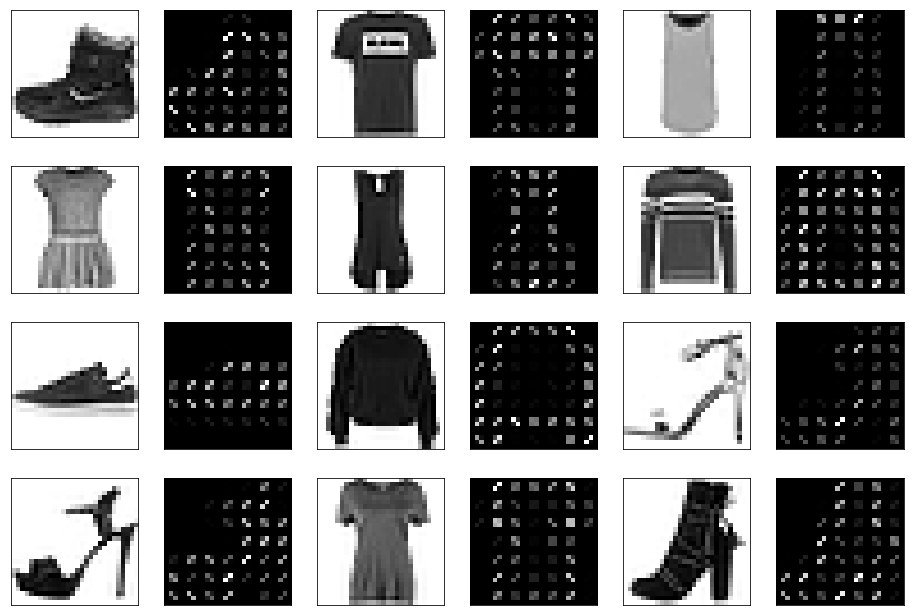

In [17]:
plt.figure(figsize=(16, 11))
for i in range(12):
    plt.subplot(4, 6, 2 * i + 1)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    
    _, hog_image = hog(train_x[i], visualize=True)
    plt.subplot(4, 6, 2 * i + 2)
    plt.imshow(hog_image, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [18]:
train_x_hog = np.array([hog(im) for im in train_x], dtype=np.float32)
val_x_hog = np.array([hog(im) for im in val_x], dtype=np.float32)
test_x_hog = np.array([hog(im) for im in test_x], dtype=np.float32)

In [19]:
model = keras.Sequential([
    keras.layers.Dropout(0.2, input_shape=(392,)),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               58950     
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 60,460
Trainable params: 60,460
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(
    train_x_hog, train_y,
    validation_data=(val_x_hog, val_y),
    epochs=50, batch_size=250,
    verbose=2)

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 1s - loss: 0.7412 - acc: 0.7417 - val_loss: 0.4676 - val_acc: 0.8328
Epoch 2/50
 - 0s - loss: 0.4891 - acc: 0.8238 - val_loss: 0.4187 - val_acc: 0.8448
Epoch 3/50
 - 0s - loss: 0.4504 - acc: 0.8353 - val_loss: 0.3996 - val_acc: 0.8576
Epoch 4/50
 - 0s - loss: 0.4295 - acc: 0.8436 - val_loss: 0.3821 - val_acc: 0.8604
Epoch 5/50
 - 0s - loss: 0.4112 - acc: 0.8493 - val_loss: 0.3746 - val_acc: 0.8618
Epoch 6/50
 - 0s - loss: 0.4009 - acc: 0.8518 - val_loss: 0.3653 - val_acc: 0.8636
Epoch 7/50
 - 0s - loss: 0.3893 - acc: 0.8555 - val_loss: 0.3533 - val_acc: 0.8698
Epoch 8/50
 - 0s - loss: 0.3751 - acc: 0.8596 - val_loss: 0.3559 - val_acc: 0.8678
Epoch 9/50
 - 0s - loss: 0.3715 - acc: 0.8619 - val_loss: 0.3433 - val_acc: 0.8724
Epoch 10/50
 - 0s - loss: 0.3666 - acc: 0.8637 - val_loss: 0.3413 - val_acc: 0.8738
Epoch 11/50
 - 0s - loss: 0.3595 - acc: 0.8668 - val_loss: 0.3373 - val_acc: 0.8746
Epoch 12/50
 - 0s - loss: 0.3533 - a

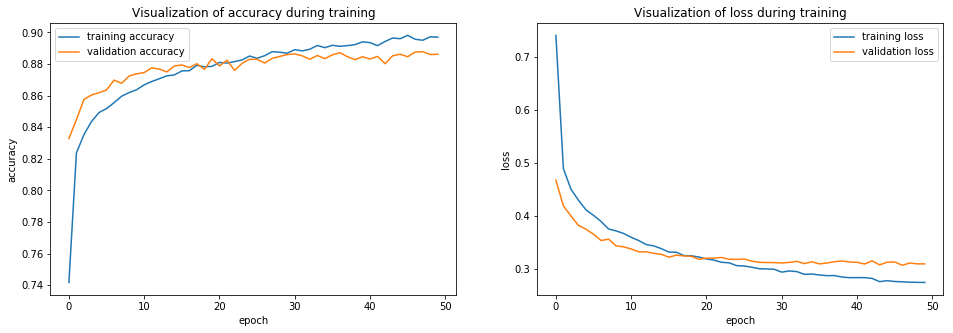

In [21]:
plot_history(history)

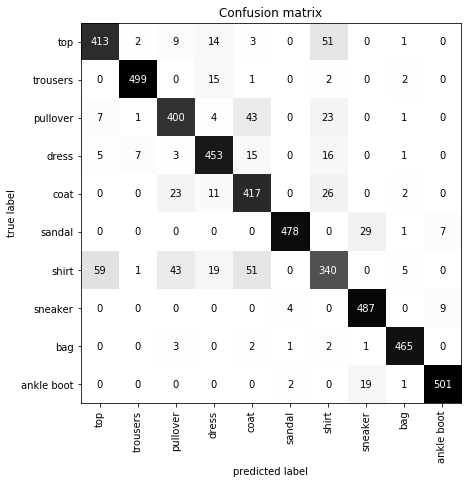

In [22]:
cm = confusion_matrix(test_y, model.predict(test_x_hog).argmax(axis=-1))
plot_confusion_matrix(cm)

In [23]:
_, acc = model.evaluate(test_x_hog, test_y, verbose=0)
print(f'Accuracy on test set: {100 * acc:.2f}%')

Accuracy on test set: 89.06%


In [24]:
model = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(1, 1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         8320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
__________

In [25]:
history = model.fit(
    train_x, train_y,
    validation_data=(val_x, val_y),
    epochs=50, batch_size=250,
    verbose=2)

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 4s - loss: 0.8847 - acc: 0.6761 - val_loss: 0.5413 - val_acc: 0.7968
Epoch 2/50
 - 3s - loss: 0.5294 - acc: 0.8104 - val_loss: 0.4217 - val_acc: 0.8532
Epoch 3/50
 - 3s - loss: 0.4494 - acc: 0.8388 - val_loss: 0.3797 - val_acc: 0.8638
Epoch 4/50
 - 3s - loss: 0.4036 - acc: 0.8546 - val_loss: 0.3501 - val_acc: 0.8724
Epoch 5/50
 - 3s - loss: 0.3745 - acc: 0.8646 - val_loss: 0.3381 - val_acc: 0.8776
Epoch 6/50
 - 3s - loss: 0.3598 - acc: 0.8701 - val_loss: 0.3186 - val_acc: 0.8864
Epoch 7/50
 - 3s - loss: 0.3391 - acc: 0.8784 - val_loss: 0.3125 - val_acc: 0.8918
Epoch 8/50
 - 3s - loss: 0.3260 - acc: 0.8830 - val_loss: 0.3004 - val_acc: 0.8920
Epoch 9/50
 - 3s - loss: 0.3199 - acc: 0.8844 - val_loss: 0.3024 - val_acc: 0.8920
Epoch 10/50
 - 3s - loss: 0.3092 - acc: 0.8884 - val_loss: 0.3001 - val_acc: 0.8956
Epoch 11/50
 - 3s - loss: 0.2974 - acc: 0.8926 - val_loss: 0.2913 - val_acc: 0.8952
Epoch 12/50
 - 3s - loss: 0.2913 - a

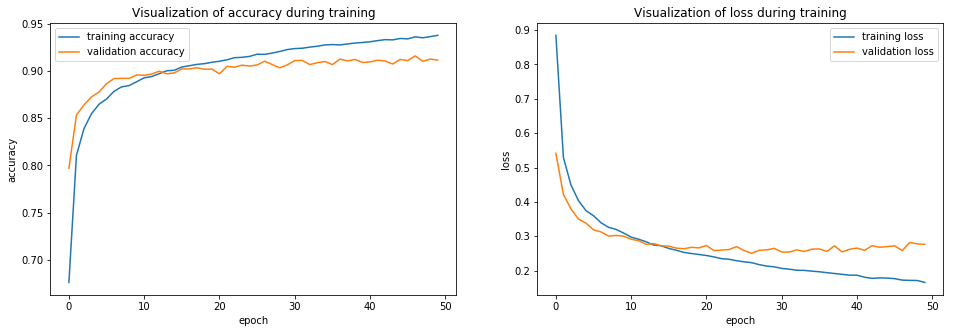

In [26]:
plot_history(history)

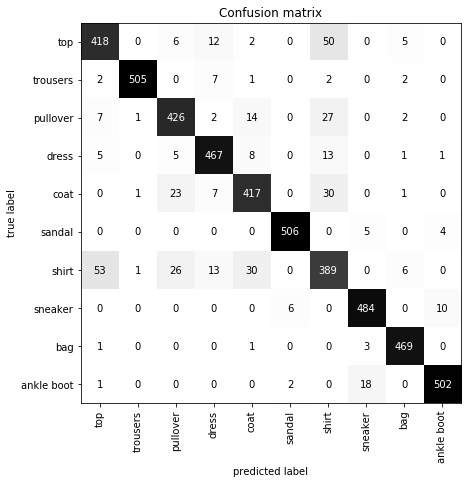

In [27]:
cm = confusion_matrix(test_y, model.predict(test_x).argmax(axis=-1))
plot_confusion_matrix(cm)

In [28]:
_, acc = model.evaluate(test_x, test_y, verbose=0)
print(f'Accuracy on test set: {100 * acc:.2f}%')

Accuracy on test set: 91.66%
